In [13]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import datasets, transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, Dataset


In [14]:
def flatten(x):
    return x.view(-1)

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(flatten)
    ])

train_data = datasets.MNIST(
        root= './data',
        train = True,
        download= True,
        transform= transform
    )


In [15]:
test_data = datasets.MNIST(
    root = './data',
    train=False,
    download = True,
    transform = transform)

In [16]:
print(torch.version.cuda)

12.1


In [17]:
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [18]:
train_data[0][0].shape

torch.Size([784])

In [19]:
class NN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
                nn.Linear(num_features, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 10)
            )
        
    def forward(self, x):
        return self.model(x)
    

In [20]:
train_loader = DataLoader(batch_size=64, dataset= train_data, shuffle= True, pin_memory= True, num_workers= 0)
test_loader = DataLoader(batch_size=64, dataset= test_data, shuffle= False, pin_memory= True, num_workers= 0)

In [21]:
model = NN(*train_data[0][0].shape) #just a fancy way of passing 784 lol
model.to(device)

NN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [22]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                   Param #
NN                                       --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       200,960
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       32,896
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       8,256
│    └─ReLU: 2-6                         --
│    └─Linear: 2-7                       650
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [24]:
epochs = 100
epoch_losses = []
model.train()
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_label in train_loader:
        batch_features, batch_label = batch_features.to(device, non_blocking = True), batch_label.to(device, non_blocking=True )
        output = model(batch_features)

        loss = criterion(output, batch_label)

        optimizer.zero_grad()
        
        loss.backward()

        optimizer.step()

        total_epoch_loss += loss.item()
    avg_loss = total_epoch_loss / len(train_loader)
    epoch_losses.append(avg_loss)
    print(f"Epoch - {epoch} | Loss - {avg_loss}")


Epoch - 0 | Loss - 2.259982488302788
Epoch - 1 | Loss - 1.2811098140694186
Epoch - 2 | Loss - 0.5276906427416974
Epoch - 3 | Loss - 0.4033663276829191
Epoch - 4 | Loss - 0.3491805839274865
Epoch - 5 | Loss - 0.31252265426078074
Epoch - 6 | Loss - 0.2832856207990697
Epoch - 7 | Loss - 0.25612364286807043
Epoch - 8 | Loss - 0.23284515992664834
Epoch - 9 | Loss - 0.2113604764384565
Epoch - 10 | Loss - 0.1921722537148863
Epoch - 11 | Loss - 0.17581266893951625
Epoch - 12 | Loss - 0.16159211281043634
Epoch - 13 | Loss - 0.14926779250115918
Epoch - 14 | Loss - 0.1388198401965598
Epoch - 15 | Loss - 0.12943075481119123
Epoch - 16 | Loss - 0.12105046456921965
Epoch - 17 | Loss - 0.11404741156115525
Epoch - 18 | Loss - 0.10693681277016968
Epoch - 19 | Loss - 0.10098554513284139
Epoch - 20 | Loss - 0.09533209758185184
Epoch - 21 | Loss - 0.09032807495943439
Epoch - 22 | Loss - 0.08544672220679266
Epoch - 23 | Loss - 0.08122309450425509
Epoch - 24 | Loss - 0.07703859762632168
Epoch - 25 | Loss - 

In [25]:
next(model.parameters()).device

device(type='cuda', index=0)

Text(0, 0.5, 'loss')

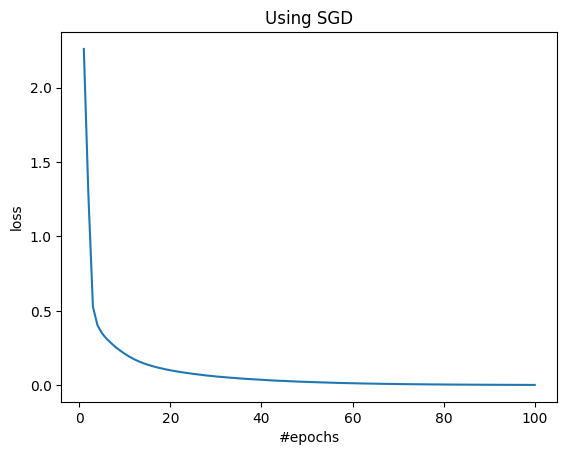

In [26]:
plt.figure()
plt.plot(range(1, epochs+1,), epoch_losses)
plt.title("Using SGD")
plt.xlabel("#epochs")
plt.ylabel("loss")